In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pylab import rcParams

from uncertainties import ufloat
from uncertainties.umath import *


main_dir = "/Volumes/FLASH/School/S2017/PHYS274L/Lab3/"


In [27]:
## -- Linear Function
def linear(x,m,c):
    return (x*m)+c

## -- Chi-2
def chisqg(ydata,ymod,sd=None):  
  """  
Returns the chi-square error statistic as the sum of squared errors between  
Ydata(i) and Ymodel(i). If individual standard deviations (array sd) are supplied,   
then the chi-square error statistic is computed as the sum of squared errors  
divided by the standard deviations.     Inspired on the IDL procedure linfit.pro.  
See http://en.wikipedia.org/wiki/Goodness_of_fit for reference.  

x,y,sd assumed to be Numpy arrays. a,b scalars.  
Returns the float chisq with the chi-square statistic.  

Rodrigo Nemmen  
http://goo.gl/8S1Oo  
  """  
  # Chi-square statistic (Bevington, eq. 6.9)  
  if sd==None:  
       chisq=np.sum((ydata-ymod)**2)  
  else:  
       chisq=np.sum( ((ydata-ymod)/sd)**2 )  

  return chisq  

def index_1(wavelength, pressure, temperature):
    sigma = 1.0 / (wavelength*10**(-6))
    bid = (8342.13 + 2406030*(130-sigma**2)**(-1) + 15997.0*(38.9-sigma**2)**(-1))
    bid2 = bid * 10**8
    
    corr = (pressure*(1+pressure*(61.3-temperature)*10**(-2)))/(96095.4*(1+0.003661*temperature))
    
    return bid2 * corr
## -- Constants 
c = 299792458 ##m/s
n_air_theo = 1.000277

## -- Measurments
#length = ufloat(0.485, 0.001) ##m
length = ufloat(0.335, 0.001)
Temp = ufloat(17.9, 0.1) ##C
Humid = 68 #%
wavelen = ufloat(6.328e-7, 0.1e-7) ## m
Pres = ufloat(10199.8, 1.0) ## Pa

In [4]:
data = np.genfromtxt(main_dir+"data.txt", delimiter=',')
fringe = data[:,0]
P_G = data[:,1] ## Gauge Pressure
d_P_G = data[:,2]

Plot 1:
Chi-2: 2.27663230241
Slope: 2.72852233677 +/- 0.0510668857413
Intercept: 1.1469072165 +/- 0.54344860837


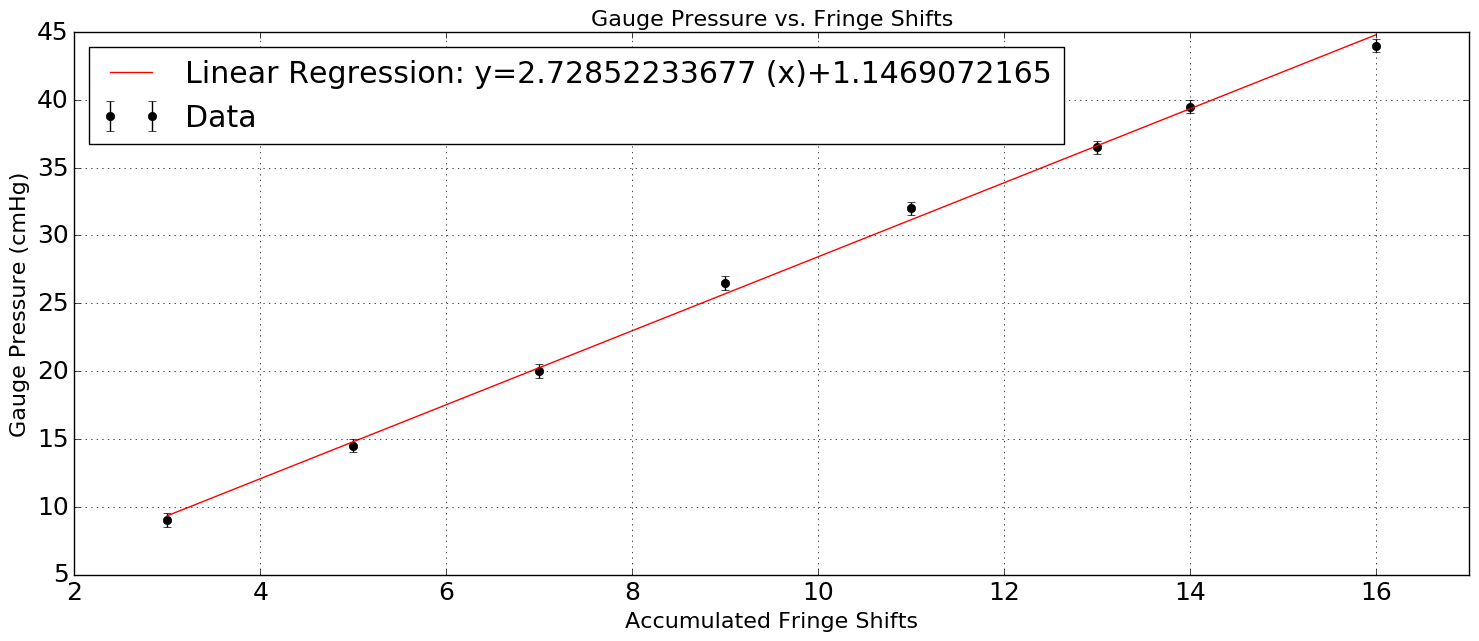

In [7]:
## -- Weighted Linear Regression
popt, pcov = curve_fit(linear, fringe, P_G, 
                       sigma=d_P_G)

plt.clf()
rcParams['figure.figsize'] = 18, 7
rcParams.update({'font.size': 18})


plt.errorbar(fringe, P_G, yerr=d_P_G, fmt='.', label="Data", 
             color="k", ms=12)

plt.plot(fringe, linear(fringe, *popt), "r-", 
         label="Linear Regression: y="+str(popt[0])+" (x)+"+str(popt[1]))

plt.title("Gauge Pressure vs. Fringe Shifts", fontsize=16)
plt.ylabel("Gauge Pressure (cmHg)", fontsize=16)
plt.xlabel("Accumulated Fringe Shifts", fontsize=16)
plt.xlim(2,17)
plt.legend(loc=2)
plt.grid()

chi2 = chisqg(P_G, linear(fringe[0:8], *popt))

print("Plot 1:")
print("Chi-2: %s")%(chi2)
print("Slope: %s +/- %s") %(popt[0], np.sqrt(pcov[0,0]))
print("Intercept: %s +/- %s") %(popt[1], np.sqrt(pcov[1,1]))

plt.savefig(main_dir+"P_gauge_fringe.png", bbox_inches='tight')

Plot 2:
Chi-2: 2.27663230241
Slope: -2.72852233678 +/- 0.0510668807635
Intercept: 74.8530927837 +/- 0.543448550158


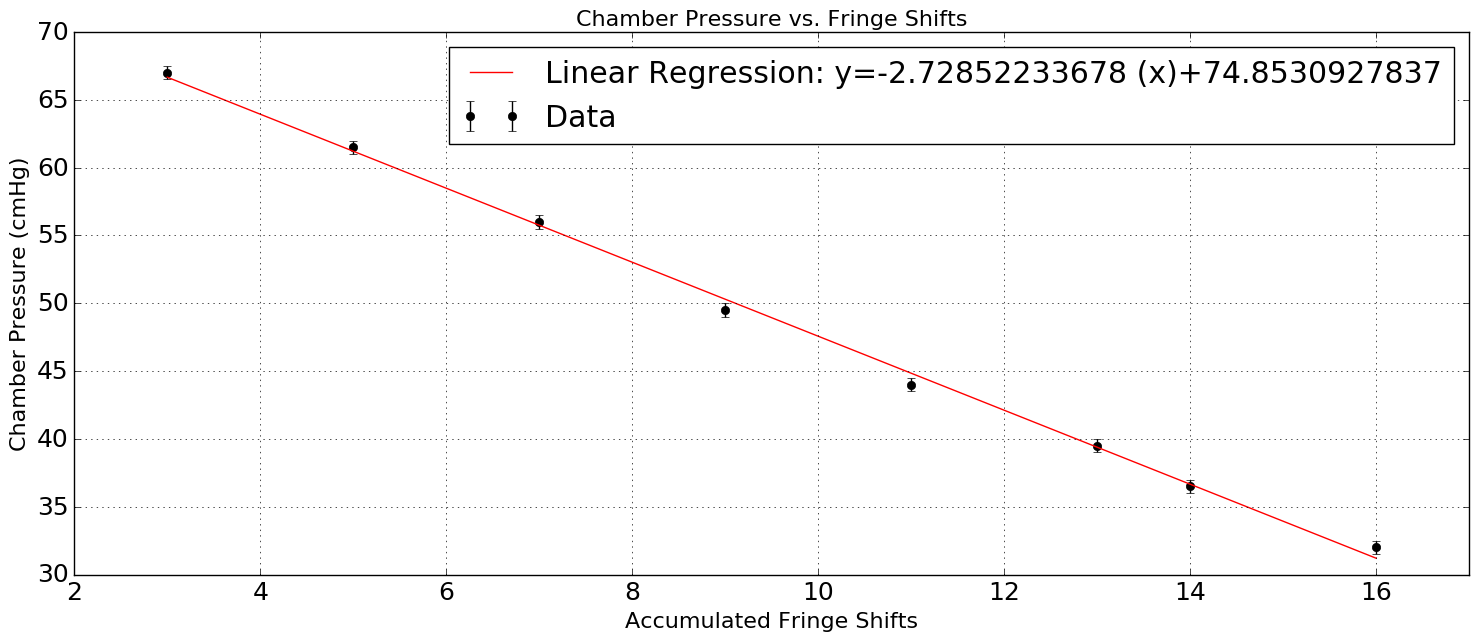

In [6]:
## -- Adjusting for chamber pressure
P_C = 76.0 - P_G ##Pressure in chamber

## -- Weighted Linear Regression
popt, pcov = curve_fit(linear, fringe[0:8], P_C[0:8], 
                       sigma=d_P_G[0:8])

plt.clf()
rcParams['figure.figsize'] = 18, 7
rcParams.update({'font.size': 18})


plt.errorbar(fringe[0:8], P_C[0:8], yerr=d_P_G[0:8], fmt='.', 
             label="Data", color="k", ms=12)

plt.plot(fringe[0:8], linear(fringe[0:8], *popt), "r-", 
         label="Linear Regression: y="+str(popt[0])+" (x)+"+str(popt[1]))

plt.title("Chamber Pressure vs. Fringe Shifts", fontsize=16)
plt.ylabel("Chamber Pressure (cmHg)", fontsize=16)
plt.xlabel("Accumulated Fringe Shifts", fontsize=16)
plt.xlim(2, 17)
plt.legend(loc=1)
plt.grid()

chi2 = chisqg(P_C, linear(fringe[0:8], *popt))
print("Plot 2:")
print("Chi-2: %s")%(chi2)
print("Slope: %s +/- %s") %(popt[0], np.sqrt(pcov[0,0]))
print("Intercept: %s +/- %s") %(popt[1], np.sqrt(pcov[1,1]))

plt.savefig(main_dir+"P_chamber_fringe.png", bbox_inches='tight')


In [8]:
## -- Calculations
slope = ufloat(popt[0], np.sqrt(pcov[0,0]))
intercept = ufloat(popt[1], np.sqrt(pcov[1,1]))

alpha = -wavelen/(2.0*length*slope)
n_air_exp = alpha*intercept + 1.0

print("Experimental Index Refraction of Air : %s")%(n_air_exp)
print("Theoretical Index Refraction of Air: %s")%(n_air_theo)
print("Z-score: %s")%((n_air_theo - n_air_exp.n)/n_air_exp.s)

Experimental Index Refraction of Air : 0.99999960+/-0.00000019
Theoretical Index Refraction of Air: 1.000277
Z-score: 1473.43847833


In [9]:

delta_alpha = sqrt(((wavelen*length.s)/(2.0*slope.n * length.n**2))**2+((wavelen*slope.s)/(2.0*length.n*slope.n**2))**2)

In [10]:
#delta_alpha*76
alpha

-3.4614985525723826e-07+/-6.56040670963149e-09

In [11]:
intercept

1.1469072164951686+/-0.5434486083695785

In [12]:
x = ufloat(1.000179, 0.000004)
print("Experimental Index Refraction of Air : %s")%(x)
print("Theoretical Index Refraction of Air: %s")%(n_air_theo)
print("Z-score: %s")%((n_air_theo - x.n)/x.s)

Experimental Index Refraction of Air : 1.000179+/-0.000004
Theoretical Index Refraction of Air: 1.000277
Z-score: 24.5


3.6794172206e+14


0.0558659217877095+/-0.00031210012171904754

In [30]:
X_theo = ufloat(1.000272, 0.00075)

print("Experimental Index Refraction of Air : %s")%(x)
print("Calculated Index Refraction of Air: %s")%(n_air_theo)
print("Z-score: %s")%((X_theo.n - x.n)/X_theo.s)


Experimental Index Refraction of Air : 1.000179+/-0.000004
Calculated Index Refraction of Air: 1.000277
Z-score: 0.124
